### Perguntas de interesse

    1. Em que etapa o gargalo de tempo do judiciário é maior?
    2. Quão efetivo são os nossos magistrados (ou juizes)?
    3. Que características os tribunais mais produtivos tem em comum?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(15,5)

pd.set_option('display.max_colwidth', None) ## padrão é 50
pd.set_option('display.max_rows', None)

var_cnj = pd.read_csv("/Users/Lucas/Documents/Python-CNJ/Dados CNJ/Variaveis_27-Ago-2019.csv",sep=";", header=0,encoding = "Latin1")
base_cnj = pd.read_csv("/Users/Lucas/Documents/Python-CNJ/Dados CNJ/JN_27-Ago-2019.csv",sep=";", header=0,encoding = "Latin1")
base_cnj.head()

#var_cnj ## utilizei esse comando para ver todas as variáveis disponíveis

/Users/Lucas/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (32,66,84,96,153,289,416,520,737,836,902,905,915,916,917,919,920,988,997,998,1016,1046,1412,1417,1418,1419,1420,1421,1422,1423) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ano,justica,sigla,dsc_tribunal,uf_sede,uf_abrangida,seq_orgao,gt,pib,h1,...,ips_sus.fisc.penal,tcl_sus.fisc.penal,munic,areakm,comarca,varae,vara,je,varaje,varah
0,2009,Estadual,TJAC,TJ - Acre,AC,Norte,8,3519085437,8342355523,732793,...,"50,67691154","0,419721719",nd,nd,nd,nd,nd,nd,nd,nd
1,2009,Estadual,TJAL,TJ - Alagoas,AL,Nordeste,9,5050139540,27133037860,3120922,...,"44,91159513","0,783538195",nd,nd,nd,nd,nd,nd,nd,nd
2,2009,Estadual,TJAM,TJ - Amazonas,AM,Norte,10,8686970064,60877122684,3480937,...,"83,99604938","0,509146579",nd,nd,nd,nd,nd,nd,nd,nd
3,2009,Estadual,TJAP,TJ - Amapá,AP,Norte,11,2384328187,8237795351,668689,...,"93,30212766","0,524211486",nd,nd,nd,nd,nd,nd,nd,nd
4,2009,Estadual,TJBA,TJ - Bahia,BA,Nordeste,12,21374933566,"1,5442E+11",14021432,...,"64,13441936","0,691531043",nd,nd,nd,nd,nd,nd,nd,nd


Antes de trabalhar com o banco de dados propriamente dito, irei selecionar as variáveis de interesse nesse relatório para que eu possa responder as perguntas propostas. 

Nessa análise decidi restringir a analise às varas da justiça estadual, que são as que cuidam de questões não relacionadas a trabalho e eleições.

In [11]:
var_usadas = ['ano','justica','sigla','munic','pib','uf_sede','uf_abrangida','porte','cn1','cn2','tbaix1','tbaix2'
              ,'mage1','mage2','ipm1','ipmc1','ipmex1','ipm2','k1','k2','pesus1','pesus2','procel1','procel2','reatc1','reat2'
              ,'reatextfisc1','sajudmag1','sajudmag2','scn1','scn2','tc1','tc2','tfaux1','tfaux2','dinf1','dinf2'
              ,'tptic','tfauxc1','tfauxc2','tfauxjl1','tfauxjl2','tpcpex1m','tpcpc1m','tpcp2m'
              ,'tpdec2m','tpsentc1m','tpsentex1m','tpbaixcrim2m','tpbaixncrim2m','tpbaixccrim1m','tpbaixcncrim1m'
              ,'tpbaixextfisc1m','tpbaixextnfisc1m','tpbaixjudcrimpl1m','tpbaixjudcrimnpl1m','tpbaixjudncrim1m']

cnj = base_cnj[var_usadas]
var = var_cnj[var_cnj.sigla.isin(var_usadas)] ## criei esse dataframe apenas para eu poder consultar o que representa cada varíavel sem ter que procura-la enre todas as outras
cnj = cnj[cnj['justica']=='Estadual']

cnj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 856
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ano                 280 non-null    int64 
 1   justica             280 non-null    object
 2   sigla               280 non-null    object
 3   munic               280 non-null    object
 4   pib                 280 non-null    object
 5   uf_sede             280 non-null    object
 6   uf_abrangida        280 non-null    object
 7   porte               280 non-null    object
 8   cn1                 280 non-null    object
 9   cn2                 280 non-null    object
 10  tbaix1              280 non-null    object
 11  tbaix2              280 non-null    object
 12  mage1               280 non-null    object
 13  mage2               280 non-null    object
 14  ipm1                280 non-null    object
 15  ipmc1               280 non-null    object
 16  ipmex1              280 no

Todas as variáveis que eu escolhi, tirando o ano, estão como object. Vou separar as variáveis que são númericas e transforma-las na categoria correta.

In [12]:
var_numerics = cnj.columns.difference(['justica', 'sigla','porte','uf_sede','uf_abrangida','munic'])

cnj[var_numerics] = cnj[var_numerics].replace(to_replace="(,)",value=".",regex=True)
cnj[var_numerics] = cnj[var_numerics].apply(pd.to_numeric, errors='coerce')
cnj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 856
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ano                 280 non-null    int64  
 1   justica             280 non-null    object 
 2   sigla               280 non-null    object 
 3   munic               280 non-null    object 
 4   pib                 280 non-null    float64
 5   uf_sede             280 non-null    object 
 6   uf_abrangida        280 non-null    object 
 7   porte               280 non-null    object 
 8   cn1                 280 non-null    int64  
 9   cn2                 280 non-null    int64  
 10  tbaix1              280 non-null    int64  
 11  tbaix2              280 non-null    int64  
 12  mage1               280 non-null    int64  
 13  mage2               280 non-null    int64  
 14  ipm1                280 non-null    float64
 15  ipmc1               280 non-null    float64
 16  ipmex1  

In [4]:
cnj.describe()
len(cnj.ano.unique())

10

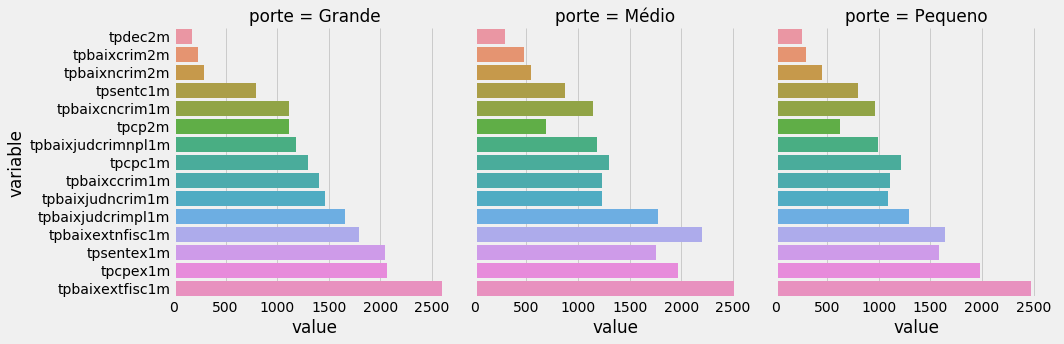

In [34]:
tempos = ['tpcpex1m','tpcpc1m','tpcp2m'
              ,'tpdec2m','tpsentc1m','tpsentex1m','tpbaixcrim2m','tpbaixncrim2m','tpbaixccrim1m','tpbaixcncrim1m'
              ,'tpbaixextfisc1m','tpbaixextnfisc1m','tpbaixjudcrimpl1m','tpbaixjudcrimnpl1m','tpbaixjudncrim1m']

tempo_instancia = cnj.groupby('porte').mean()[tempos].drop('nd').reset_index()

tempo_instancia_long = pd.melt(tempo_instancia, id_vars='porte', value_vars= tempos).sort_values(['porte','value'])
sns.catplot(data=tempo_instancia_long,x='value',y='variable',col='porte',kind='bar')


In [41]:
var_cnj[var_cnj.sigla.isin(tempos)]

,sigla,dsc_sigla
941,tpbaixccrim1m,TpBaixCCrim1 - Média
949,tpbaixcncrim1m,TpBaixCNCrim1 - Média
957,tpbaixcrim2m,TpBaixCrim2 - Média
970,tpbaixextfisc1m,TpBaixExtFisc1 - Média
978,tpbaixextnfisc1m,TpBaixExtNFisc1 - Média
990,tpbaixjudcrimnpl1m,TpBaixJudCrimNPL1 - Média
998,tpbaixjudcrimpl1m,TpBaixJudCrimPL1 - Média
1006,tpbaixjudncrim1m,TpBaixJudNCrim1 - Média
1016,tpbaixncrim2m,TpBaixNCrim2 - Média
1042,tpcp2m,TpCp2 - Média


Iniciarei a analise pela produtividade dos Magistrados (juizes). No gráfico abaixo é possível verificar que a produtividade dos magistrados aumentou ao  longo dos anos.

/Users/Lucas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


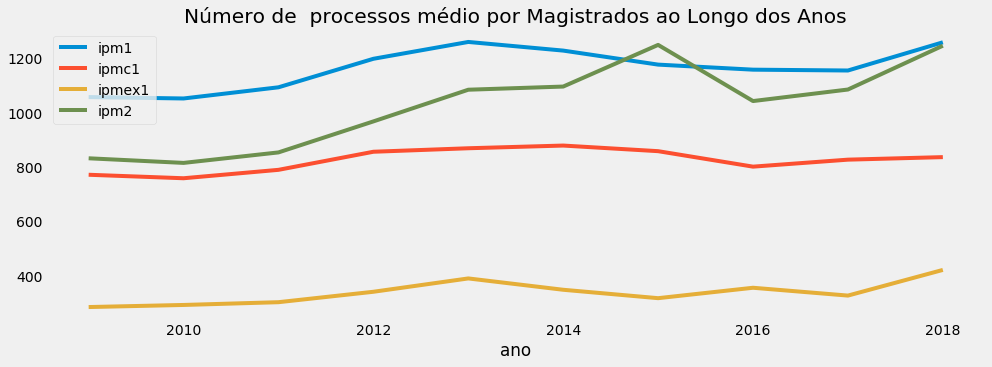

In [14]:
produtividade = cnj.groupby('ano')['ipm1','ipmc1','ipmex1','ipm2'].mean()

titulo = "Número de  processos médio por Magistrados ao Longo dos Anos"
produtividade.plot(title=titulo,grid=False,legend=True)

In [6]:
diff_1 = (produtividade.loc[2018,'ipm1'] - produtividade.loc[2009,'ipm1']).round() 
diff_2 = (produtividade.loc[2018,'ipm2'] - produtividade.loc[2009,'ipm2']).round()

print("Diferença no 1 grau {} \nDiferença no 2 grau {}".format(diff_1,diff_2))

Diferença no 1 grau 201.0 
Diferença no 2 grau 414.0


A produtividade do Magistrado no 2 grau é consideravelmente menor em 2009 e aumenta até se igualar com o magistrado no 2 grau. Uma análise separada por tribunal pode fornecer uma visão mais esclarecida desse aumento.

O mapa de calor abaixo mostra que a produtividade cresceu de forma diferente entre os tribunais de cada estado, em que o crescimento geral foi puxado por alguns tribunais em que o magistrado mais do que duplicou sua produtividade. 

In [7]:
produtividade_1grau = cnj.loc[cnj['ano'].isin([2009,2018])].pivot(index='sigla', columns='ano', values='ipm1')
produtividade_1grau["diff_1"] = (produtividade_1grau[2018] - produtividade_1grau[2009])/produtividade_1grau[2009]

produtividade_2grau = cnj.loc[cnj['ano'].isin([2009,2018])].pivot(index='sigla', columns='ano', values='ipm2')
produtividade_2grau["diff_2"] = (produtividade_2grau[2018] - produtividade_2grau[2009])/produtividade_2grau[2009]

diff = pd.merge(produtividade_1grau, produtividade_2grau, left_index=True, right_index=True,suffixes=('_1grau','_2grau'))
diff.style.bar(subset=['diff_1','diff_2'], align='mid', color=['#d65f5f', '#5fba7d'])

ano,2009_1grau,2018_1grau,diff_1,2009_2grau,2018_2grau,diff_2
sigla,,,,,,
TJ,1374.680787,1523.751534,0.108440,1113.879274,1448.103806,0.300055
TJAC,475.767857,917.000000,0.927411,273.333333,524.833333,0.920122
TJAL,544.465347,1242.186992,1.281480,234.533333,1516.600000,5.466458
TJAM,1003.504000,2505.935714,1.497186,320.105263,551.153846,0.721789
TJAP,1067.327586,825.833333,-0.226261,143.000000,451.888889,2.160062
TJBA,646.989655,1588.857143,1.455769,670.914286,915.302326,0.364261
TJCE,1141.956113,920.199357,-0.194190,1380.294118,878.186046,-0.363769
TJDFT,891.349282,984.108871,0.104066,954.000000,1070.355932,0.121966
TJES,874.157025,1054.430894,0.206226,1260.461538,1109.607143,-0.119682


In [8]:
# marcador dos estados com bum de produtividade 
Bum_Produtividade_1g = produtividade_1grau.loc[produtividade_1grau['diff_1']>0.5].index.tolist()
Bum_Produtividade_2g = produtividade_2grau.loc[produtividade_2grau['diff_2']>0.5].index.tolist()

Iremos validar 2 hipóteses que possam responder a que se deu esse aumento:

1. Os magistrados trabalharam mais horas
2. Os magistrados receberam mais recursos (pessoal e tecnologias) que aumentaram a produtividade

A  primeira hipótese podemos verificar pela carga de trabalo dos magistrados no gráfico abaixo

In [9]:
k_trabalho = cnj.groupby(['ano','porte']).mean()[['k1','k2']].reset_index()
k_trabalho = pd.wide_to_long(k_trabalho,stubnames=['k'],i=['ano'],j= 'grau').reset_index()
sns.barplot(data=k_trabalho,x='ano',y='k',hue='grau')


ValueError: the id variables need to uniquely identify each row

In [26]:
carga_trabalho = cnj.groupby(['ano']).mean()[['k1','k2']]
carga_trabalho['diff_k1'] = carga_trabalho['k1'].diff(periods=9)
carga_trabalho['diff_k2'] = carga_trabalho['k2'].diff(periods=9)
carga_trabalho

,k1,k2,diff_k1,diff_k2
ano,,,,
2009,4637.792380,1786.002827,NaN,NaN
2010,4611.246665,1776.809666,NaN,NaN
2011,4993.080269,1903.960863,NaN,NaN
2012,5322.968855,2283.322126,NaN,NaN
2013,5542.355490,2404.726135,NaN,NaN
2014,5501.887199,2581.290809,NaN,NaN
2015,5765.829803,2666.763790,NaN,NaN
2016,5799.558758,2538.113582,NaN,NaN
2017,5661.254737,2599.346107,NaN,NaN


Logo de cara, vemos que os magistrados do 1 grau possuem uma carga de trabalho maior do que o 2 segundo grau. Ainda assim, a produtividade dos juizes no 2 grau aumentou ao longo dos anos até se igualar, em 2018, aos do 1 grau, mesmo trabalhando a metade do tempo. 

Vamos analisar essas informações por TJ considerando o grupo de TJ's com bum na produtividade. 

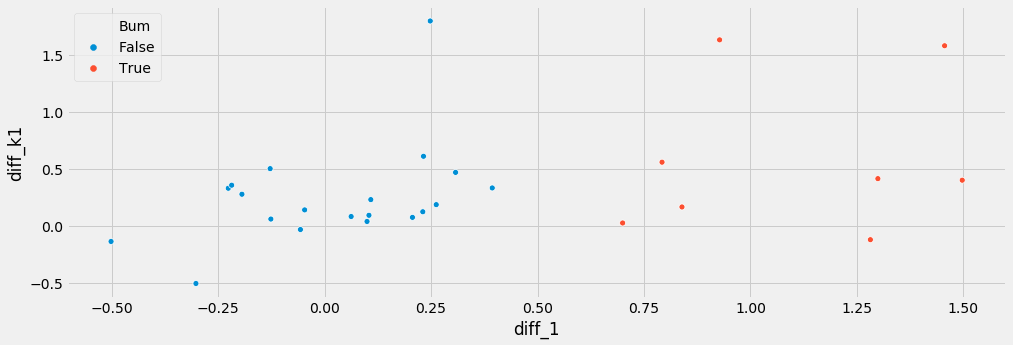

In [27]:
k1_por_tj = cnj.loc[cnj['ano'].isin([2009,2018])].pivot(index='sigla', columns='ano', values='k1')
k1_por_tj["diff_k1"] = (k1_por_tj[2018] - k1_por_tj[2009])/k1_por_tj[2009]

diff = pd.merge(produtividade_1grau, k1_por_tj, left_index=True, right_index=True,suffixes=('_prd','_k'))
diff['Bum'] = diff.index.isin(Bum_Produtividade_1g)

ax = sns.scatterplot(x="diff_1", y="diff_k1", hue="Bum",
                     data=diff)

Aparentemente no primeiro grau não há uma relação forte entre a carga horária e a produtividade dos magistrados

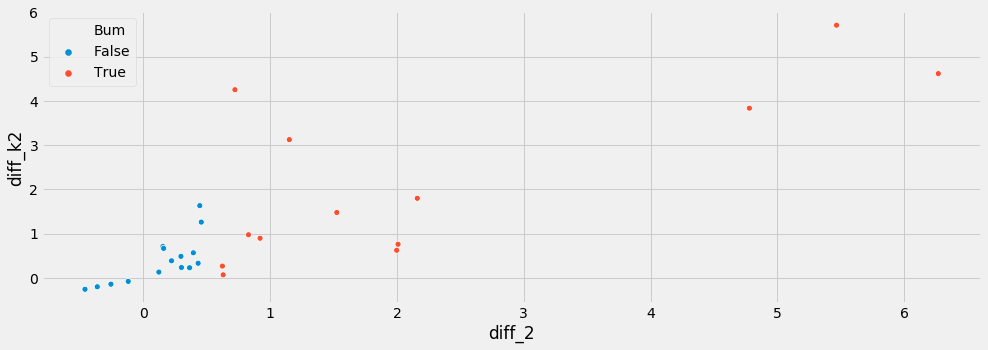

In [28]:
k2_por_tj = cnj.loc[cnj['ano'].isin([2009,2018])].pivot(index='sigla', columns='ano', values='k2')
k2_por_tj["diff_k2"] = (k2_por_tj[2018] - k2_por_tj[2009])/k2_por_tj[2009]

diff = pd.merge(produtividade_2grau, k2_por_tj, left_index=True, right_index=True,suffixes=('_prd','_k'))
diff['Bum'] = diff.index.isin(Bum_Produtividade_2g)

ax = sns.scatterplot(x="diff_2", y="diff_k2", hue="Bum",
                     data=diff)

já o segundo grau mostra um padrão mais claro de que um aumento na carga horária teve um efeito na produtividade dos magistrados. 

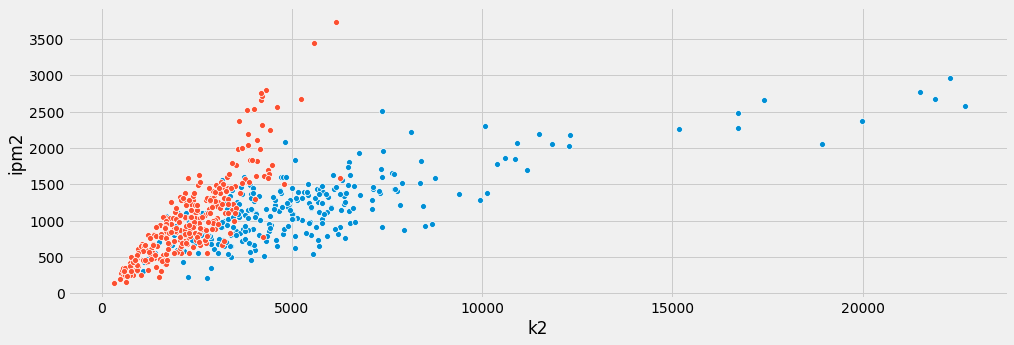

In [29]:
sns.scatterplot(x="k1", y="ipm1",data= cnj[['ano','sigla','k1','ipm1']])
sns.scatterplot(x="k2", y="ipm2",data= cnj[['ano','sigla','k2','ipm2']])

Parece que uma variação na carga de trabalho dos magistrados do 2 grau tem um impacto bem maior do que um aumento na carga horário dos magistrados no 2 grau. Provavelmente os magistrados no 1 grau estão no limite das horas trabalhadas e um aumento na sua carga de trabalho é menos efetivo. A curva do aumento de produtividade quase se achata nas cargas mais pesadas de trabalho.

Para a segunda analise, iremos verificar 2 fatores. Gasto do tribunal com a área de TI e quantidade de servidores por magistrado.

In [30]:
cnj['bum1'] = cnj.sigla.isin(Bum_Produtividade_1g)
cnj['bum2'] = cnj.sigla.isin(Bum_Produtividade_2g)

Dados incompletos:
- juizes leigos (até 2014)
- conciliadores (até 2014)
- total da força de trabalho auxiliar (até 2014)
- total de pessoas da área de TI (a partir de 2015)

/Users/Lucas/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


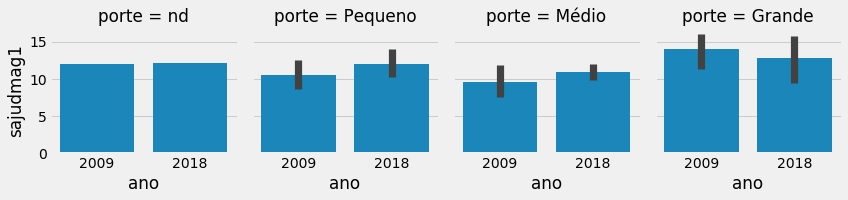

In [71]:
 media_por_bum = cnj[cnj.ano.isin(['2018','2009'])][['sigla','ano','sajudmag1','bum1','porte']].sort_values(['bum1','sigla','ano'])
#sns.lineplot(data=media_por_bum,x='ano',y='sajudmag1',hue='bum1',style='porte')

g = sns.FacetGrid(media_por_bum, col="porte")
g.map(sns.barplot, "ano", "sajudmag1");

#https://seaborn.pydata.org/tutorial/axis_grids.html

In [ ]:
 cnj[cnj.ano.isin(['2018','2009'])][['sigla','ano','sajudmag1','bum1','porte']].sort_values(['bum1','sigla','ano'])
#sns.lineplot(data=media_por_bum,x='ano',y='sajudmag1',hue='bum1',style='porte')

In [10]:
var_cnj

,sigla,dsc_sigla
0,a1,A1 - Assistência Judiciária Gratuita em relação à Despesa Total da Justiça
1,a2,A2 - Assistência Judiciária Gratuita por 100.000 habitantes (R$)
2,a3,A3  Percentual de processos de justiça gratuita arquivados definitivamente
3,ag,Ag - Agravos de Recursos e Agravos do art. 557
4,ag2,Ag2º - Agravos de Recursos e Agravos do art. 557 de 2º Grau
5,agdda,AgDDA  Agravos às Decisões Denegatórias de Admissibilidade
6,ai2,AI2º - Agravos às Decisões Denegatórias de Admissibilidade de Recurso de Revista e Recurso Ordinário para o TST
7,ano,Ano
8,ap1,AP1º - Agravos de Petição
9,apublic,Apublic  Acórdãos Publicados
